In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import mpmath as mp
import math

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd
from scipy import stats
import scipy
from scipy.optimize import minimize
from numpy import linalg as LA

from LGF_funcs import *
import time

# Comparing the asymptotic expansion of Katsura and Inawashiro

In [93]:
mp.dps = 50

c_vec = [0.001]
alpha = 1

n = 0
n_pts =10000
n_sample = 15

#distvec0 = np.random.choice(range(n_pts), n_sample, replace=True)
#distvec1 = np.random.choice(range(n_pts), n_sample, replace=True)

distvec = np.logspace(0, 14, n_sample, base = 2, dtype = int)
print(distvec)
rdvec = np.random.uniform(0, 1, n_sample)
distvec0 = np.round(np.sqrt(rdvec*distvec**2))
distvec1 = np.round(np.sqrt((1-rdvec)*distvec**2))
#distvec0 = np.arange(1, n_sample+1, 10)
#distvec1 = np.arange(1, n_sample+1, 10)

marker_vec = ["x", "s","^","v", "+"]
#distvec = np.random.choice(range(n_pts), n_sample - 1, replace=False)
#distvec = np.append(distvec, n_sample)

N_vec_mat = np.zeros((len(c_vec), 9))
N_vec = np.arange(10, 55, 5) 
for i in range(len(c_vec)):
    for j in range(len(N_vec)):
        if (i == 0):
            N_vec_mat[i,j] = N_vec[j] * 2**(len(c_vec) - i - 2)
        else:
            N_vec_mat[i,j] = N_vec[j] * 2**(len(c_vec) - i - 1)


vs = np.zeros((len(distvec0), len(c_vec)))
v_exp = np.zeros((len(distvec0), len(c_vec)))
print(v_exp.shape)
for i in range(len(distvec0)):
    tmp_n = distvec0[i]
    tmp_m = distvec1[i]

    for j in range(len(c_vec)):
        c = c_vec[j]
        eps = 1e-10
        lbd = 2 + 2*alpha
        c_ratio = lbd/(lbd+c**2)

        #vv = eval_lgf_appell(c, tmp_n, tmp_m, alpha)
        vv = eval_lgf(c, 1, tmp_n, tmp_m, 100000)
        vs[i,j] = vv

        vv = LGF_Katsura(c, tmp_n, tmp_m)
        v_exp[i, j] = vv
    #vv = eval_lgf(0.002, 0, tmp_m, 100000)
    

#print(vs - v_exp)

[    1     2     4     8    16    32    64   128   256   512  1024  2048
  4096  8192 16384]
(15, 1)


<Figure size 640x480 with 0 Axes>

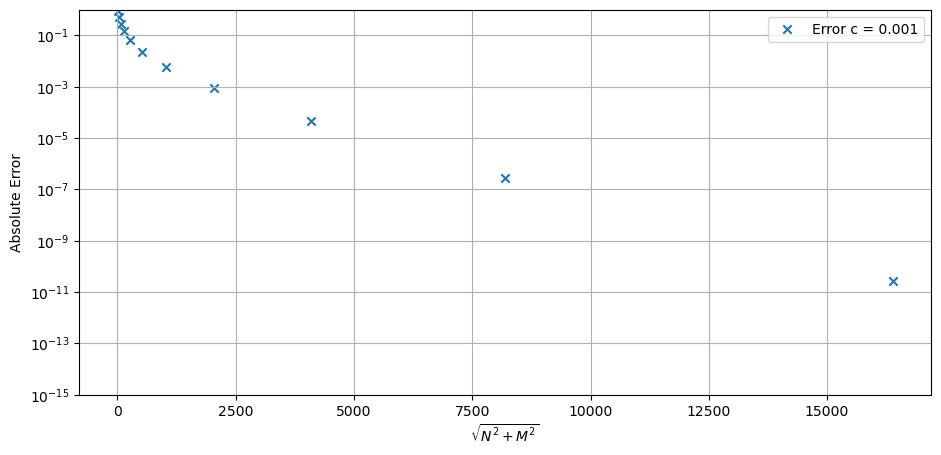

In [94]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig = plt.figure(figsize=(11,5))
ax = plt.gca()



for i in range(len(c_vec)):
    N_vecc = np.linspace(N_vec_mat[i, 0]*0.6, N_vec_mat[i, -1]*1.2, 20)
    c = c_vec[i]
    lbd = 2 + 2*alpha
    c_ratio = lbd/(lbd+c**2)

    diff = np.abs(v_exp[:, i] - vs[:,i])
    m_and_n = np.sqrt(np.power(distvec0,2) + np.power(distvec1,2))
    plt.scatter(m_and_n, diff, label='Error c = ' + str(c_vec[i]), marker=marker_vec[i])
    #y = np.power(c_ratio, N_vecc)
    #plt.semilogy(N_vecc, y, label='Error bound c = ' + str(c_vec[i]))



# Customizing major grid lines (optional)
#plt.grid(which='major', linestyle='-', linewidth=0.75)
#plt.grid(which='minor', linestyle='-', linewidth=0.75)
            
plt.yscale('log')
plt.grid(which='both')
plt.ylim(1e-15, 1)
#plt.minorticks_on()

#plt.xticks(np.arange(0,240,20))

locmajy = matplotlib.ticker.LogLocator(base=10,numticks=10) 
#locminy = matplotlib.ticker.LogLocator(base=10,subs=np.arange(0, 10, 2),numticks=100) # subs=(0.2,0.4,0.6,0.8)
locminy = matplotlib.ticker.LogLocator(base=10,subs=[2,5],numticks=100) # subs=(0.2,0.4,0.6,0.8)

#ax.yaxis.set_major_locator(locmajy)
#ax.yaxis.set_minor_locator(locminy)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xlabel(r'$\sqrt{N^2 + M^2}$')
plt.ylabel('Absolute Error')
plt.legend()
plt.minorticks_off()






#plt.show()
#ax.yaxis.set_minor_formatter(FormatStrFormatter("%.6f"))

#matplotlib.axis.Axis.xaxis.set_minor_locator(mticker.LogLocator(base=2.0, subs=(0.1,0.2,0.4,0.6,0.8)))

#plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
#plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.savefig('Katsura_Inawashiro/error_LGF_expansion.pdf')

<Figure size 640x480 with 0 Axes>

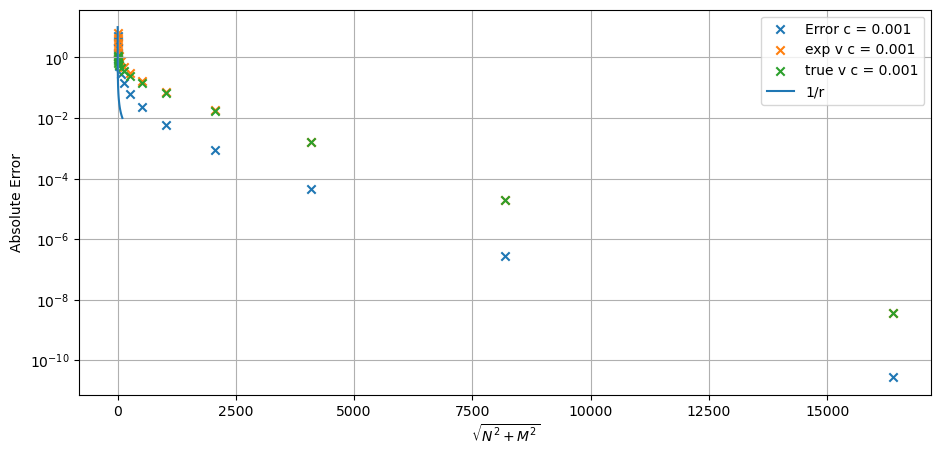

In [95]:
# Comparing with exponential scaling
plt.clf()
fig = plt.figure(figsize=(11,5))
ax = plt.gca()



for i in range(len(c_vec)):
    N_vecc = np.linspace(N_vec_mat[i, 0]*0.6, N_vec_mat[i, -1]*1.2, 20)
    c = c_vec[i]
    lbd = 2 + 2*alpha
    c_ratio = lbd/(lbd+c**2)

    diff = np.abs(v_exp[:, i] - vs[:,i])
    r = np.sqrt(np.power(distvec0,2) + np.power(distvec1,2))

    mu = distvec0/r
    nu = distvec1/r
    a = 2 + c**2/2
    x = (a**2 - 4)/(1 + (1 - (1-1/a/a)*(mu**2 - nu**2)**2)**0.5)
    term3 = np.exp(-r*(mu*(np.arccosh(1+mu**2*x))**0.5 + nu*(np.arccosh(1+nu**2*x))**0.5))
    plt.scatter(r, diff, label='Error c = ' + str(c_vec[i]), marker=marker_vec[i])

    plt.scatter(r, v_exp[:,i], label='exp v c = ' + str(c_vec[i]), marker=marker_vec[i])

    plt.scatter(r, vs[:,i], label='true v c = ' + str(c_vec[i]), marker=marker_vec[i])

    #y = np.power(c_ratio, N_vecc)
    #plt.semilogy(N_vecc, y, label='Error bound c = ' + str(c_vec[i]))
r_lin = np.linspace(0.1, 100, 100)
plt.plot(r_lin, 1/r_lin, label='1/r')
#plt.ylim(1e-10, 1)


# Customizing major grid lines (optional)
#plt.grid(which='major', linestyle='-', linewidth=0.75)
#plt.grid(which='minor', linestyle='-', linewidth=0.75)
            
plt.yscale('log')
plt.grid(which='both')
#plt.minorticks_on()

#plt.xticks(np.arange(0,240,20))

locmajy = matplotlib.ticker.LogLocator(base=10,numticks=10) 
#locminy = matplotlib.ticker.LogLocator(base=10,subs=np.arange(0, 10, 2),numticks=100) # subs=(0.2,0.4,0.6,0.8)
locminy = matplotlib.ticker.LogLocator(base=10,subs=[2,5],numticks=100) # subs=(0.2,0.4,0.6,0.8)

#ax.yaxis.set_major_locator(locmajy)
#ax.yaxis.set_minor_locator(locminy)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xlabel(r'$\sqrt{N^2 + M^2}$')
plt.ylabel('Absolute Error')
plt.legend()
plt.minorticks_off()

<Figure size 640x480 with 0 Axes>

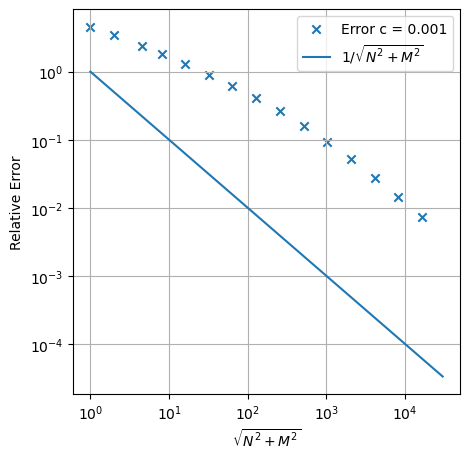

In [97]:
# Comparing with exponential scaling
plt.clf()
fig = plt.figure(figsize=(5,5))
ax = plt.gca()



for i in range(len(c_vec)):
    N_vecc = np.linspace(N_vec_mat[i, 0]*0.6, N_vec_mat[i, -1]*1.2, 20)
    c = c_vec[i]
    lbd = 2 + 2*alpha
    c_ratio = lbd/(lbd+c**2)

    diff = np.abs(v_exp[:, i] - vs[:,i])
    r = np.sqrt(np.power(distvec0,2) + np.power(distvec1,2))

    mu = distvec0/r
    nu = distvec1/r
    a = 2 + c**2/2
    x = (a**2 - 4)/(1 + (1 - (1-1/a/a)*(mu**2 - nu**2)**2)**0.5)
    term3 = np.exp(-r*(mu*(np.arccosh(1+mu**2*x))**0.5 + nu*(np.arccosh(1+nu**2*x))**0.5))
    plt.scatter(r, diff/vs[:,i], label='Error c = ' + str(c_vec[i]), marker=marker_vec[i])

    #y = np.power(c_ratio, N_vecc)
    #plt.semilogy(N_vecc, y, label='Error bound c = ' + str(c_vec[i]))
r_lin = np.linspace(1, 30000, 30000)
plt.plot(r_lin, 1/r_lin, label=r'$1/\sqrt{N^2 + M^2}$')
#plt.ylim(1e-10, 1)


# Customizing major grid lines (optional)
#plt.grid(which='major', linestyle='-', linewidth=0.75)
#plt.grid(which='minor', linestyle='-', linewidth=0.75)
            
plt.yscale('log')
plt.xscale('log')
plt.grid(which='major')
#plt.minorticks_on()

#plt.xticks(np.arange(0,240,20))

locmajy = matplotlib.ticker.LogLocator(base=10,numticks=10) 
#locminy = matplotlib.ticker.LogLocator(base=10,subs=np.arange(0, 10, 2),numticks=100) # subs=(0.2,0.4,0.6,0.8)
locminy = matplotlib.ticker.LogLocator(base=10,subs=[2,5],numticks=100) # subs=(0.2,0.4,0.6,0.8)

#ax.yaxis.set_major_locator(locmajy)
#ax.yaxis.set_minor_locator(locminy)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xlabel(r'$\sqrt{N^2 + M^2}$')
plt.ylabel('Relative Error')
plt.legend()
plt.minorticks_off()
plt.savefig('Katsura_Inawashiro/error_LGF_expansion_normalized.pdf')

## Use more c to show near field difference

In [82]:
mp.dps = 50

c_vec = [0.1, 0.2, 0.5, 1]
alpha = 1

n = 0
n_pts =20
n_sample = 40

distvec0 = np.random.choice(range(n_pts), n_sample, replace=True)
distvec1 = np.random.choice(range(n_pts), n_sample, replace=True)

#distvec0 = np.arange(1, n_sample+1, 10)
#distvec1 = np.arange(1, n_sample+1, 10)

marker_vec = ["x", "s","^","v", "+"]
#distvec = np.random.choice(range(n_pts), n_sample - 1, replace=False)
#distvec = np.append(distvec, n_sample)

N_vec_mat = np.zeros((len(c_vec), 9))
N_vec = np.arange(10, 55, 5) 
for i in range(len(c_vec)):
    for j in range(len(N_vec)):
        if (i == 0):
            N_vec_mat[i,j] = N_vec[j] * 2**(len(c_vec) - i - 2)
        else:
            N_vec_mat[i,j] = N_vec[j] * 2**(len(c_vec) - i - 1)


vs = np.zeros((len(distvec0), len(c_vec)))
v_exp = np.zeros((len(distvec0), len(c_vec)))
print(v_exp.shape)
for i in range(len(distvec0)):
    tmp_n = distvec0[i]
    tmp_m = distvec1[i]

    for j in range(len(c_vec)):
        c = c_vec[j]
        eps = 1e-10
        lbd = 2 + 2*alpha
        c_ratio = lbd/(lbd+c**2)

        #vv = eval_lgf_appell(c, tmp_n, tmp_m, alpha)
        vv = eval_lgf(c, 1, tmp_n, tmp_m, 100000)
        vs[i,j] = vv

        vv = LGF_Katsura(c, tmp_n, tmp_m)
        v_exp[i, j] = vv
    #vv = eval_lgf(0.002, 0, tmp_m, 100000)
    

#print(vs - v_exp)

(40, 4)


<Figure size 640x480 with 0 Axes>

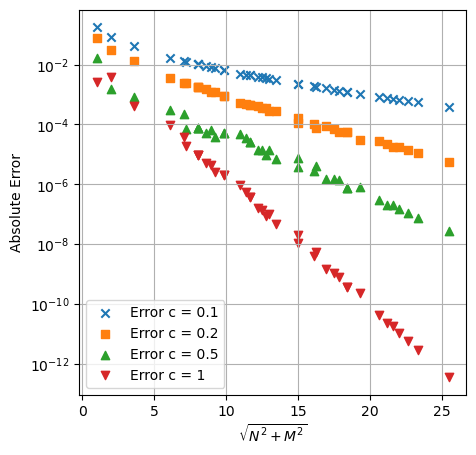

In [83]:
import matplotlib
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig = plt.figure(figsize=(5,5))
ax = plt.gca()



for i in range(len(c_vec)):
    N_vecc = np.linspace(N_vec_mat[i, 0]*0.6, N_vec_mat[i, -1]*1.2, 20)
    c = c_vec[i]
    lbd = 2 + 2*alpha
    c_ratio = lbd/(lbd+c**2)

    diff = np.abs(v_exp[:, i] - vs[:,i])
    m_and_n = np.sqrt(np.power(distvec0,2) + np.power(distvec1,2))
    plt.scatter(m_and_n, diff, label='Error c = ' + str(c_vec[i]), marker=marker_vec[i])
    #y = np.power(c_ratio, N_vecc)
    #plt.semilogy(N_vecc, y, label='Error bound c = ' + str(c_vec[i]))



# Customizing major grid lines (optional)
#plt.grid(which='major', linestyle='-', linewidth=0.75)
#plt.grid(which='minor', linestyle='-', linewidth=0.75)
            
plt.yscale('log')
plt.grid(which='both')
#plt.ylim(1e-11, 1)
#plt.minorticks_on()

#plt.xticks(np.arange(0,240,20))

locmajy = matplotlib.ticker.LogLocator(base=10,numticks=10) 
#locminy = matplotlib.ticker.LogLocator(base=10,subs=np.arange(0, 10, 2),numticks=100) # subs=(0.2,0.4,0.6,0.8)
locminy = matplotlib.ticker.LogLocator(base=10,subs=[2,5],numticks=100) # subs=(0.2,0.4,0.6,0.8)

#ax.yaxis.set_major_locator(locmajy)
#ax.yaxis.set_minor_locator(locminy)
#ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xlabel(r'$\sqrt{N^2 + M^2}$')
plt.ylabel('Absolute Error')
plt.legend()
plt.minorticks_off()






#plt.show()
#ax.yaxis.set_minor_formatter(FormatStrFormatter("%.6f"))

#matplotlib.axis.Axis.xaxis.set_minor_locator(mticker.LogLocator(base=2.0, subs=(0.1,0.2,0.4,0.6,0.8)))

#plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
#plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

plt.savefig('Katsura_Inawashiro/error_LGF_expansion_near.pdf')